<a href="https://colab.research.google.com/github/mC-kimT/thv/blob/main/Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from fastai.metrics import *
from matplotlib import pyplot as plt


import os
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
conda install -c conda-forge ipywidgets

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done



In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import torch
import torchvision

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
torch.cuda.empty_cache()

In [6]:
path = 'C:\\Users\\emielou\\Desktop\\classification\\C_DATASET\\W_DATASET'

In [7]:
class_names = []
for folder_name in os.listdir(path):
    class_names.append(folder_name)

In [8]:
class_names 

['.ipynb_checkpoints', 'w_img']

In [9]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{path}/{class_name}')
    for image_name in image_names:
        image_path = f'{path}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [10]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [11]:
df.head()

,name,label
0,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Creative_Style,1
1,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Girl_Nextdoor_Style,1
2,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Modern_Style,1
3,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Punk_Fashion_Style,1
4,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/sexy_Style,1


In [12]:
df.tail()

,name,label
5,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Sport_Style,1
6,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Stylish_Style,1
7,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Tomboy_Fashion_Style,1
8,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Vibrant_Style,1
9,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/w_labels (2).csv,1


In [13]:
df.head()

,name,label
0,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Creative_Style,1
1,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Girl_Nextdoor_Style,1
2,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Modern_Style,1
3,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Punk_Fashion_Style,1
4,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/sexy_Style,1


In [14]:
df.tail()

,name,label
5,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Sport_Style,1
6,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Stylish_Style,1
7,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Tomboy_Fashion_Style,1
8,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/Vibrant_Style,1
9,C:\Users\emielou\Desktop\classification\C_DATASET\W_DATASET/w_img/w_labels (2).csv,1


In [15]:
#convert into csv file
df.to_csv(
    path_or_buf=f'{path}/labels.csv',
    index=False
)

In [16]:
dls =ImageDataLoaders.from_folder(
    path=path,
    item_tfms=Resize(224),
    bs=16,
    num_workers=0,
    valid_pct=0.2, seed=42)


In [17]:
dls.vocab

['Creative_Style', 'Girl_Nextdoor_Style', 'Modern_Style', 'Punk_Fashion_Style', 'Sport_Style', 'Stylish_Style', 'Tomboy_Fashion_Style', 'Vibrant_Style', 'sexy_Style']

In [18]:
print(dls.vocab, dls.c)

['Creative_Style', 'Girl_Nextdoor_Style', 'Modern_Style', 'Punk_Fashion_Style', 'Sport_Style', 'Stylish_Style', 'Tomboy_Fashion_Style', 'Vibrant_Style', 'sexy_Style'] 9


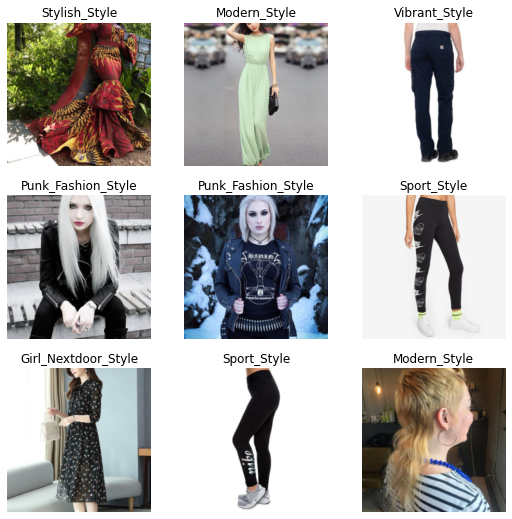

In [19]:
dls.show_batch()

In [20]:
print(len(dls.train_ds), len(dls.valid_ds))

3996 998


In [21]:
w_model = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

In [22]:
w_model.fine_tune(
    epochs = 10
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.521186,1.127429,0.651303,0.348697,08:42


epoch,train_loss,valid_loss,accuracy,error_rate,time


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 2.00 GiB total capacity; 1.62 GiB already allocated; 0 bytes free; 1.69 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
w_model.save('C_D_Image')

In [ ]:
w_model.show_results()

In [ ]:
w_model.predict(
    item= "C:\\Users\\emielou\\Desktop\\classification\\trial_images\\trial1.jpg"
)

In [ ]:
# MAN CLASSIFICATION 

In [ ]:
w_PATH = "C:\\Users\\emielou\\Desktop\\classification\\C_DATASET\\M_DATASET"

In [ ]:
W_class_names = []
for folder_name in os.listdir(w_PATH):
    class_names.append(folder_name)

In [ ]:
W_class_names

In [ ]:
image_paths = []
labels = []

for i in range(len(W_class_names)):
    W_class_names = W_class_names[i]
    image_names = os.listdir(f'{PATH}/{W_class_names}')
    for image_name in image_names:
        image_path = f'{PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [ ]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.to_csv(
    path_or_buf=f'{path}/labels.csv',
    index=False
)

In [ ]:
dls =ImageDataLoaders.from_folder(
    path=path,
    item_tfms=Resize(224),
    bs=16,
    num_workers=0,  
    valid_pct=0.2, seed=42)

In [ ]:
dls.vocab

In [ ]:
print(dls.vocab, dls.c)

In [ ]:
dls.show_batch()

In [ ]:
print(len(dls.train_ds), len(dls.valid_ds))

In [ ]:
learn = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

In [ ]:
defaults.device = torch.device('cuda')

In [ ]:
learn.fine_tune(
    epochs=5
)

In [ ]:
learn.save('M_Image')

In [ ]:
learn.show_results()

In [ ]:
learn.export('image_classifier.pkl')

In [ ]:
new_learn = load_learner(f'{DATASET_PATH}/image_classifier.pkl')